In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
def Comb(m,n):
    
    diff = m - n 
    
    if diff < 0 or n < 0:
        return 0
    
    else:
        
        f = 1
        g = 1
        
        while m > diff:
            f *= m
            m -= 1
            
        while n>0:
            g *= n
            n -= 1
            
        return f/g

In [9]:
Comb(4,2)

6.0

In [10]:
def f(x,y):
    return Comb(3,x)*Comb(2,y)*Comb(3,4-x-y)/Comb(8,4)

In [11]:
x = np.array([0,1,2,3])
y = np.array([0,1,2])

In [12]:
F = np.zeros((4,3))

for i in range(4):
    for j in range(3):
        F[i,j] = f(x[i],y[j])

In [13]:
F

array([[0.        , 0.02857143, 0.04285714],
       [0.04285714, 0.25714286, 0.12857143],
       [0.12857143, 0.25714286, 0.04285714],
       [0.04285714, 0.02857143, 0.        ]])

In [14]:
np.sum(F)

0.9999999999999999

<AxesSubplot: >

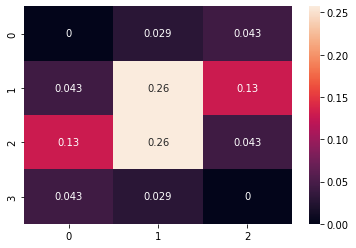

In [15]:
sns.heatmap(F,annot=True)

In [17]:
g = np.sum(F, axis=1)
h = np.sum(F, axis=0)
print(g)
print(h)

[0.07142857 0.42857143 0.42857143 0.07142857]
[0.21428571 0.57142857 0.21428571]


In [18]:
# Suponemos que las variables son independientes
G = np.zeros_like(F)

for i in range(len(x)):
    for j in range(len(y)):
        G[i,j] = g[i]*h[j]

In [19]:
G

array([[0.01530612, 0.04081633, 0.01530612],
       [0.09183673, 0.24489796, 0.09183673],
       [0.09183673, 0.24489796, 0.09183673],
       [0.01530612, 0.04081633, 0.01530612]])

In [20]:
meanx = np.sum(x*g)
meany = np.sum(y*h)
print(meanx,meany)

1.4999999999999998 1.0


In [21]:
cov = 0

for i in range(4):
    for j in range(3):
        cov += (x[i] - meanx)*(y[j]-meany)*f(x[i],y[j])
        
cov

-0.2142857142857143

In [22]:
cov = 0

for i in range(4):
    for j in range(3):
        cov += (x[i] - meanx)*(y[j]-meany)*G[i,j]
        
cov

0.0